In [1180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mkreg

In [1181]:
x, y = mkreg(n_samples=250, n_features=1, noise=10)

In [1182]:
y = y + abs(y/2)
y = y.reshape(y.shape[0], 1)
y.shape

(250, 1)

In [1183]:
x.shape

(250, 1)

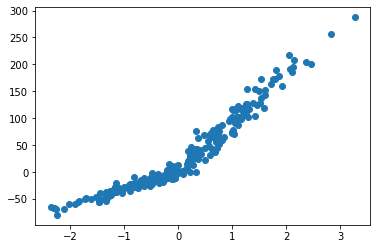

In [1184]:
plt.scatter(x, y)

In [1185]:
bias = np.ones((y.shape[0], 1))
X = np.concatenate((x**2, x, bias), axis=1)

In [1186]:
theta = np.random.randn(X.shape[1], 1)
theta

array([[ 1.33707787],
       [ 1.93841017],
       [-0.78248362]])

In [1187]:
def model(X, theta):
    return X.dot(theta)

In [1188]:
def cost(X, y, theta):
    m = y.shape[0]
    return (1/(2*m)) * np.sum((model(X, theta) - y)**2)

cost(X, y, theta)

2682.506754686449

In [1189]:
def grad(X, y, theta):
    m = y.shape[0]
    return (1/m) * X.T.dot(model(X, theta) - y)

In [1190]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost(X, y, theta)
    return theta, cost_history

In [1191]:
theta_optim, cost_history = gradient_descent(X, y, theta, 0.01, 400)
theta_optim

array([[12.21967777],
       [60.30057657],
       [12.49319824]])

In [1192]:
predictions = model(X, theta_optim)

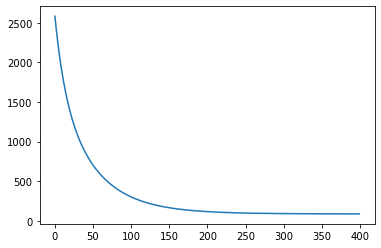

In [1193]:
plt.plot(cost_history)

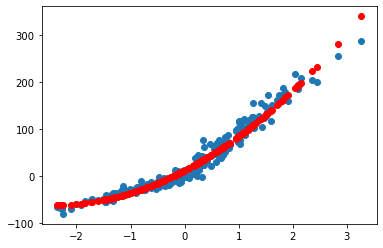

In [1194]:
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

In [1195]:
def determination_coef(y, predictions):
    u = np.sum((y - predictions))**2
    v = np.sum((y - y.mean())**2)
    return 1 - u/v

In [1196]:
determination_coef(y, predictions)

0.9690990916529691